# Lab5 Final assignment: putting it all together

The final assignment is an individual assignment in which you put things together. You earn 6 points when you carry out the basic tasks and an additional 4 points for analysing and discussing the results poperly. The maximum score is 10 points.

<ol>
    <li><b>Annotated Eliza conversations</b> [2 Points]
        <ul>
        <li> Load the annotated Eliza conversations in a Pandas data frame (code is given)
        <li>  Provide a statistical analysis of the emotion labels in the data per speaker
        </ul>
    <li><b>GO-emotions</b> [2 points]
        <ul>
        <li> Create a pipeline for the GO-emotion classifier
        <li> Apply the pipeline to the turns in the conversation
        <li> Map the GO labels to Ekman labels using a motivated(!) threshold
        <li> Generate a classification report and confusion matrix as evaluation
        </ul>
    <li><b>Train a BoW SVM Ekman emotion classifier combining both the MELD and Tweet data</b> [2 POINTS]
        <ul>
        <li> Load the train, test and development data from MELD and WASSA
        <li> Discuss the statistics of the training data for the Ekman emotions
        <li> Create a BoW vector representation and train an SVM classifier
        <li> Save the classifier to disk
        <li> Load the classifier in this notebook and apply it to the Eliza utterances
        <li> Generate a classification report and confusion matrix as evaluation
        </ul>
    <li><b>Discuss the result</b> [4 POINTS]
        <ul>
        <li> Report on similarities and differences in performances and confusion matrixes 
        <li> What did you expect (recall and precision) and is this confirmed or falsified?
        <li> An error analysis of a manual selection of 10-20 utterances [motivate your selection]?
        <li> Discuss how you could improve the SVM classification
        </ul>    
</ol>

For 3.), you build a BoW SVM classifier in a separate notebook (use **lab5.meld-tweet-bow-svm-emotion-classifier.ipynb**) to combine the MELD and Tweet data into a single set of training data. Note that you can also include the test and development data for training since we are applying the model to the Eliza conversations and not to the MELD and Wassa tests. 

## 1. Submission

The assignment should be made individually and submiited on CANVAS as a zip file that includes the following:

   1. The notebook to create a BoW-SVM combining MELD and Tweets for Ekman classification: **lab5.meld-tweet-bow-svm-emotion-classifier.ipynb**
   2. The current notebook **lab5.final_assignment.ipynb** with your code
   3. A PDF report of max 5 pages:
       1. Section 1: what you have done and what choices did you make: be explicit about the settings and any data changes you made to train a classifier on MELD+Tweets
       2. Section 2: report on the Ekman classification results. Use a single table for recall, precision and f-score and put confusion matrixes in the appendix.
       3. Section 3: discuss the results comparing the SVM and the GO-classifier and the insights from your error analysis
       4. Section 4: how to improve the SVM classifier
    
Use the notebooks that are given as a guide with the code and the output. You should NOT discuss the results in the notebooks but in the report. Use the notebooks to run the experiments and get the results. Include the tables and figures in the report.

Some utility functions presented during this course are needed for this assignment. They are all included in the Python file **lab5_util.py**. The next import makes these functions available in this notebook. There is no need to copy these functions into this notebook explicitly. After the import, you can call the function from **util**, e.g.:

```emotion_labels = sort_predictions(emotion_labels[0])```

```ekman_labels = util.get_averaged_mapped_scores_by_threshold(ekman_map, emotion_labels, threshold)```

```util.plot_labels_with_counts(labels, values)```

In [1]:
import lab5_util as util

## 2. Loading the conversation saved on disk

You receive a file with all the annoated conversations in JSON format. Load this file using Pandas to create a data frame.
The next code also applies the **get_test_utterances_and_labels** functions in util to extract from the dataframe the utterances and the Gold labels. It skips the utterances and labels from Eliza, which are all labeled as ```neutral```.


In [2]:
# LOAD THE TEST DATA AND LABELS
import pandas as pd
file = "2022_2023_eliza.csv"
df = pd.read_csv(file, sep=";")
df = df.dropna()
test_instances, test_labels = util.get_test_utterances_and_labels(df)
print(len(test_instances), len(test_labels))

2129 2129


You have now an equal number of utterances and labels to test the classifiers.

### 1.2 Provide a statistical analysis of the test data

Emotion Distribution for speaker speaker_1:
Total of values 50


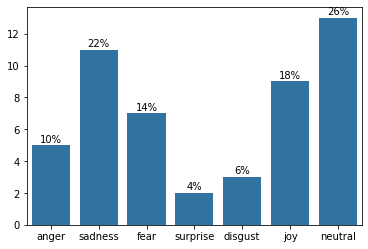

Emotion Distribution for speaker speaker_2:
Total of values 50


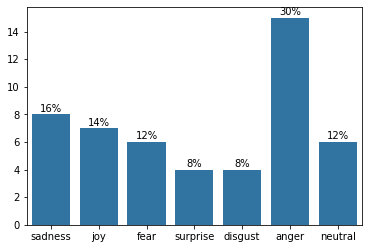

Emotion Distribution for speaker speaker_3:
Total of values 50


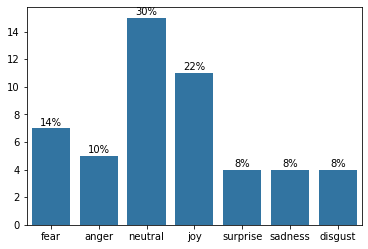

Emotion Distribution for speaker speaker_4:
Total of values 28


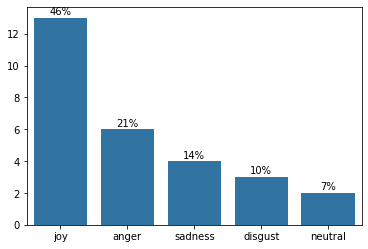

Emotion Distribution for speaker speaker_5:
Total of values 50


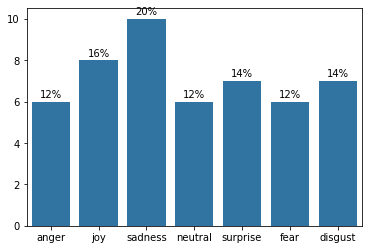

Emotion Distribution for speaker speaker_6:
Total of values 50


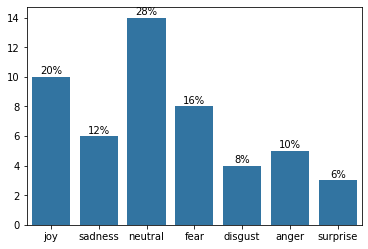

Emotion Distribution for speaker speaker_7:
Total of values 50


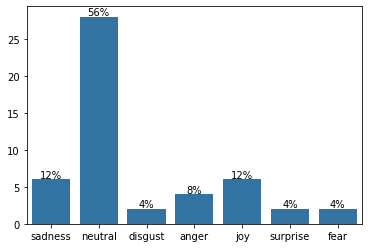

Emotion Distribution for speaker speaker_8:
Total of values 52


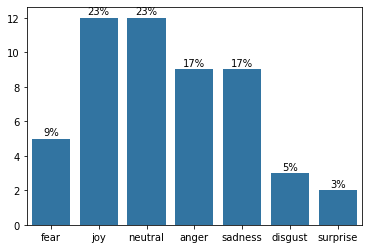

Emotion Distribution for speaker speaker_9:
Total of values 49


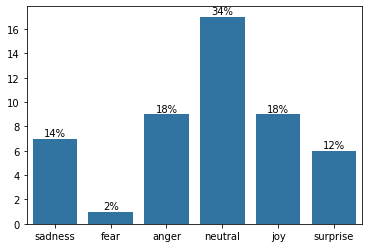

Emotion Distribution for speaker speaker_10:
Total of values 55


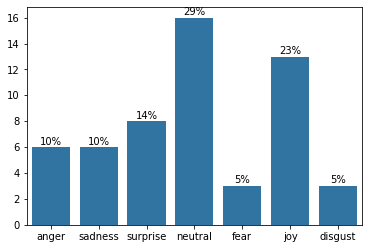

Emotion Distribution for speaker speaker_11:
Total of values 50


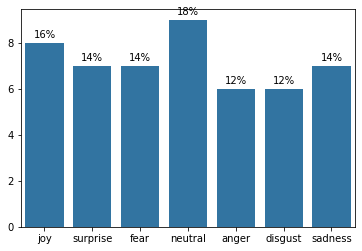

Emotion Distribution for speaker speaker_12:
Total of values 50


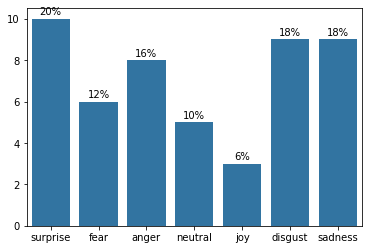

Emotion Distribution for speaker speaker_13:
Total of values 53


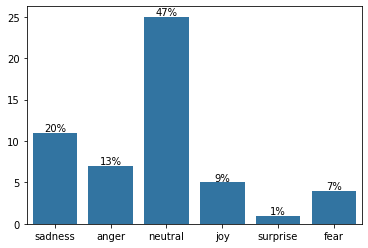

Emotion Distribution for speaker speaker_14:
Total of values 10


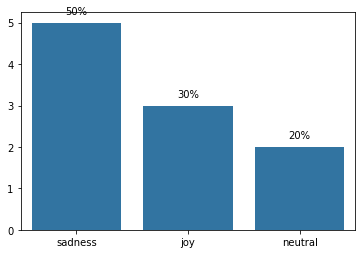

Emotion Distribution for speaker speaker_15:
Total of values 51


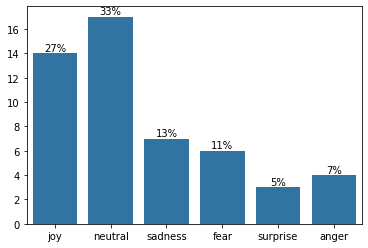

Emotion Distribution for speaker speaker_16:
Total of values 61


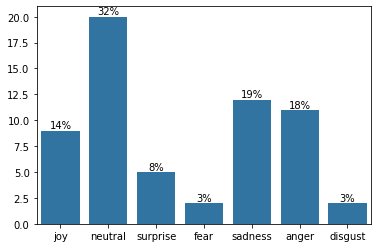

Emotion Distribution for speaker speaker_17:
Total of values 10


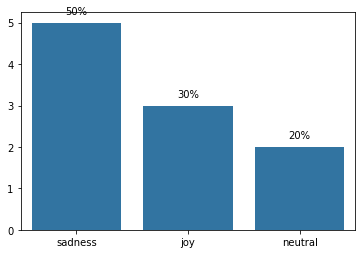

Emotion Distribution for speaker speaker_18:
Total of values 50


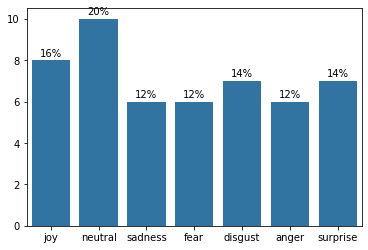

Emotion Distribution for speaker speaker_19:
Total of values 51


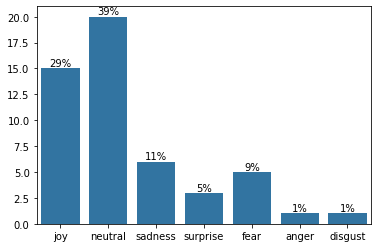

Emotion Distribution for speaker speaker_20:
Total of values 51


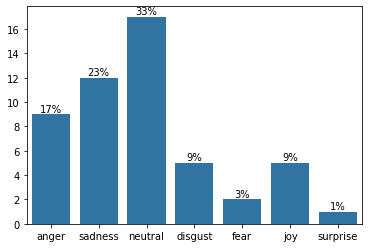

Emotion Distribution for speaker speaker_21:
Total of values 50


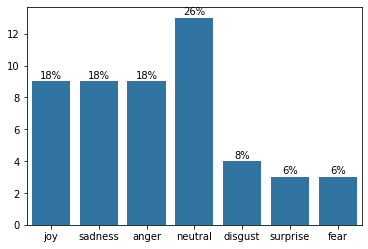

Emotion Distribution for speaker speaker_22:
Total of values 50


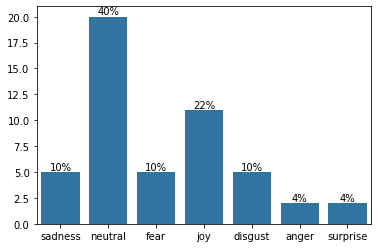

Emotion Distribution for speaker speaker_24:
Total of values 50


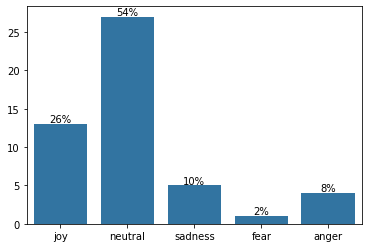

Emotion Distribution for speaker Pechorin:
Total of values 56


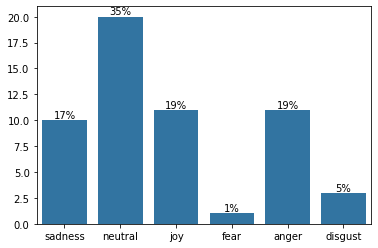

Emotion Distribution for speaker Hi:
Total of values 74


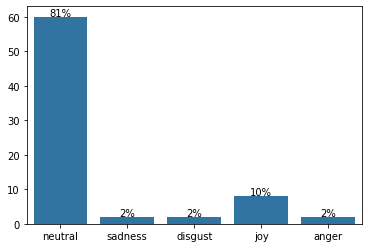

Emotion Distribution for speaker John:
Total of values 61


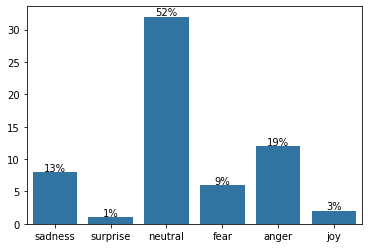

Emotion Distribution for speaker Murat:
Total of values 53


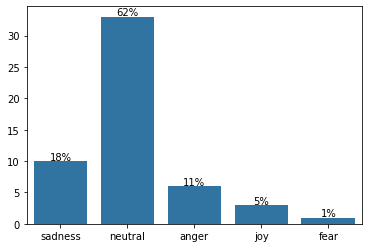

Emotion Distribution for speaker Alex:
Total of values 104


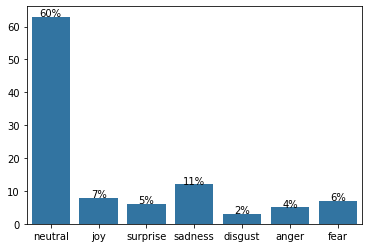

Emotion Distribution for speaker Hi my name is Misha:
Total of values 3


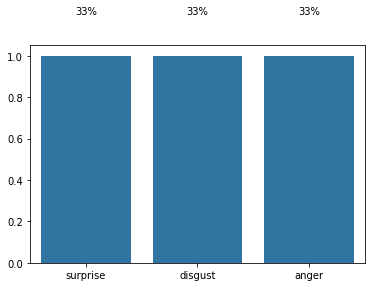

Emotion Distribution for speaker misha:
Total of values 55


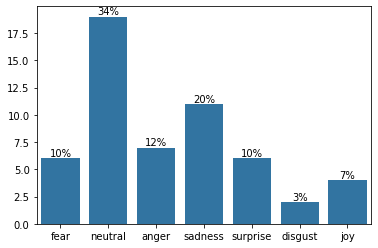

Emotion Distribution for speaker Anna:
Total of values 110


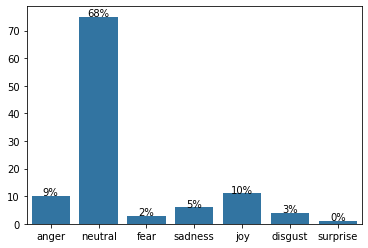

Emotion Distribution for speaker Ben:
Total of values 60


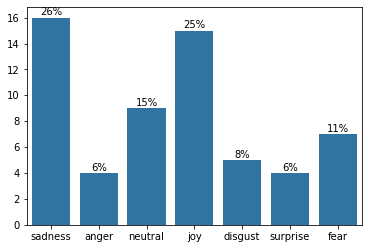

Emotion Distribution for speaker yo bro what's up! I'm Danna.:
Total of values 15


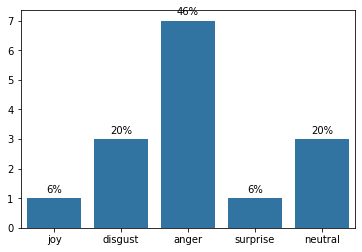

Emotion Distribution for speaker Hey bro what's up! I'm Danna.:
Total of values 12


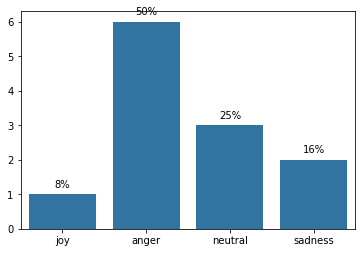

Emotion Distribution for speaker D:
Total of values 34


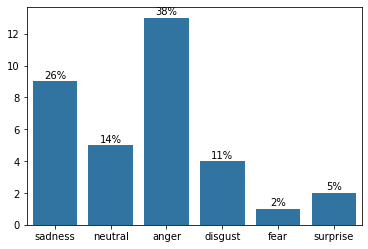

Emotion Distribution for speaker Emma:
Total of values 60


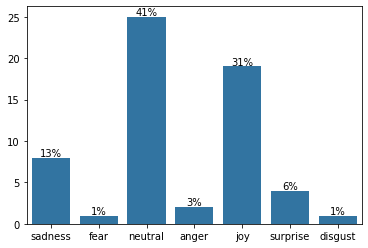

Emotion Distribution for speaker Bubu:
Total of values 52


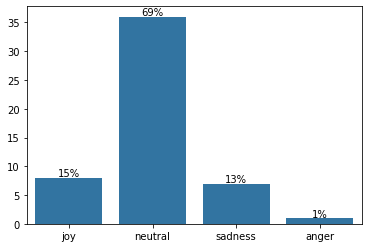

Emotion Distribution for speaker Sarah:
Total of values 52


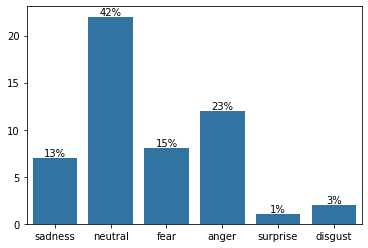

Emotion Distribution for speaker Anne:
Total of values 49


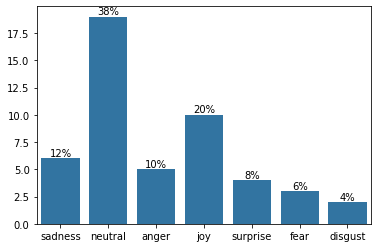

Emotion Distribution for speaker September:
Total of values 51


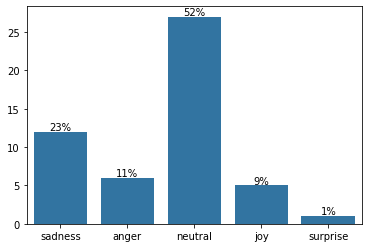

Emotion Distribution for speaker Brian:
Total of values 51


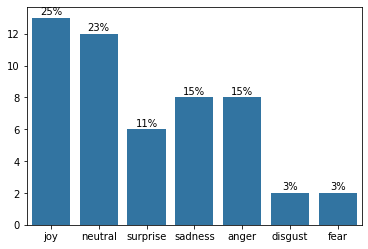

Emotion Distribution for speaker Ruby:
Total of values 55


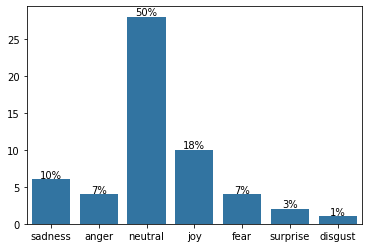

Emotion Distribution for speaker Andriana:
Total of values 51


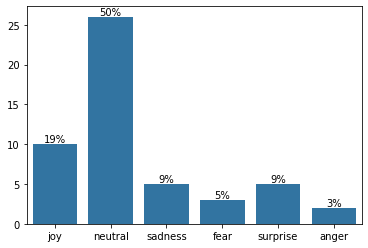

In [3]:
from collections import defaultdict
from collections import Counter

# Create a dict for the emotions
speaker2emotion = defaultdict(list)
for speaker, emotion in zip(df['speaker'], df['Gold']):
    speaker2emotion[speaker].append(emotion)

# Plot the emotion distribution per speaker
for speaker, labels in speaker2emotion.items():
    if speaker != 'Eliza':
        print(f'Emotion Distribution for speaker {speaker}:')
        emotion_counts = Counter(labels)
        util.plot_labels_with_counts(list(emotion_counts.keys()), list(emotion_counts.values()))

## 2. Apply the GO classifier

In the next part, you will apply the GO_EMOTION classifier *emotion* to the conversation loaded in a Pandas frame. You will also map the GO_EMOTIONS to the 6 basic Ekman emotion and to neutral. For the mappings, we added the utility functions to **lab5_util.py** . We also define a sort function to list the emotions from the highest score down. You first need to haved imported **lab5_util** as decribed above.

## 2.1 Create a pipeline for the GO Classifier

In [4]:
from transformers import pipeline

# Create the bert pipeline
model_name = "bhadresh-savani/bert-base-go-emotion" 
emotion_pipeline = pipeline('sentiment-analysis', 
                    model=model_name, return_all_scores=True, truncation=True)


### 2.2 Apply the GO classifier pipeline to the conversation and convert the result to Ekman

In [5]:
# Define a threshold 
threshold = 0.125
print('Threshold', threshold)

go_ekman_emotions = []
go_ekman_scores = []

# Get the prediction per utterance
for utterance in test_instances:
    emotion_labels = emotion_pipeline(utterance)
    sorted_emotion_labels = util.sort_predictions(emotion_labels[0])

    ekman_labels = util.get_averaged_mapped_scores_by_threshold(util.ekman_map, emotion_labels, threshold)
    if ekman_labels:
        # Append the label with the best score as prediction
        go_ekman_emotions.append(ekman_labels[0]['label'])
        go_ekman_scores.append(ekman_labels[0]['score'])
    else:
        #### none of the labels scored above the threshold
        go_ekman_emotions.append('None')
        go_ekman_scores.append(0)

Threshold 0.125


## 2.3 Evaluation

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels = list(test_labels)+list(go_ekman_emotions)
label_set = sorted(set(labels))
print(label_set)

report = classification_report(test_labels,go_ekman_emotions ,digits = 7, target_names=label_set)
print('----------------------------------------------------------------')
print('GO EKMAN mapping with threshold', threshold)

print(report)

['None', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
----------------------------------------------------------------
GO EKMAN mapping with threshold 0.125
              precision    recall  f1-score   support

        None  0.0000000 0.0000000 0.0000000         0
       anger  0.5413223 0.5019157 0.5208748       261
     disgust  0.7560976 0.2897196 0.4189189       107
        fear  0.8350515 0.5586207 0.6694215       145
         joy  0.5452716 0.7900875 0.6452381       343
     neutral  0.6426887 0.6542617 0.6484236       833
     sadness  0.7510730 0.5555556 0.6386861       315
    surprise  0.4378698 0.5920000 0.5034014       125

    accuracy                      0.6143729      2129
   macro avg  0.5636718 0.4927701 0.5056205      2129
weighted avg  0.6373789 0.6143729 0.6122140      2129



c:\Users\xelfj\AppData\Local\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\xelfj\AppData\Local\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\xelfj\AppData\Local\Programs\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   0   0   0   0   0   0   0]
 [  0 131   3   1  13  84   9  20]
 [  0  23  31   3   6  30  11   3]
 [  0   7   0  81   7  39   8   3]
 [  0   3   2   1 271  58   4   4]
 [  1  46   1   7 155 545  23  55]
 [  0  28   4   3  33  62 175  10]
 [  1   4   0   1  12  30   3  74]]


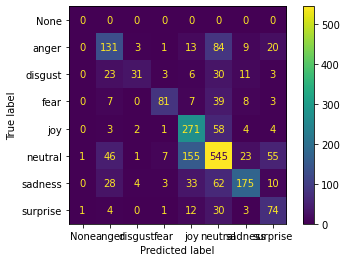

In [9]:
# Create the confusion matrix
cf_matrix = confusion_matrix(test_labels,go_ekman_emotions)
print(cf_matrix)
display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=label_set)
display.plot()

## 3 Apply the BoW classifier

### 3.1 Load the BoW SVM classifier from MELD and TWEETS

In [22]:
import pickle 
# load the classifier and the vectorizer build from MELD and TWEETS data from disk
loaded_classifier = pickle.load(open('models/svm_linear_clf_bow.sav', 'rb'))
loaded_vectorizer = pickle.load(open('models/vectorizer.sav', 'rb'))
loaded_tfidftransformer = pickle.load(open('models/tfidf_transformer.sav', 'rb'))

### 3.2 Apply the classifier to the conversation

In [23]:
# APPLY THE CLASSIFIER TO THE UTTERANCES
x_test = loaded_tfidftransformer.transform(loaded_vectorizer.transform(test_instances))
bow_pred = loaded_classifier.predict(x_test)

c:\Users\xelfj\AppData\Local\Programs\Python\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


## 3.3 Evaluation

----------------------------------------------------------------
BoW SVM report
              precision    recall  f1-score   support

         joy  0.5487179 0.4099617 0.4692982       261
    surprise  0.4146341 0.1588785 0.2297297       107
     sadness  0.5111111 0.4758621 0.4928571       145
        fear  0.5957447 0.5714286 0.5833333       343
     disgust  0.5546147 0.7863145 0.6504469       833
     neutral  0.7091837 0.4412698 0.5440313       315
       anger  0.2500000 0.1040000 0.1468927       125

    accuracy                      0.5617661      2129
   macro avg  0.5120009 0.4211022 0.4452270      2129
weighted avg  0.5555048 0.5617661 0.5402392      2129

----------------------------------------------------------------
BoW SVM confusion matrix
[[107   8   6  16 107   9   8]
 [  8  17   7   9  61   3   2]
 [  7   0  69   4  57   6   2]
 [ 14   1   7 196 117   7   1]
 [ 40   5  31  55 655  23  24]
 [ 10   3   7  34 120 139   2]
 [  9   7   8  15  64   9  13]]


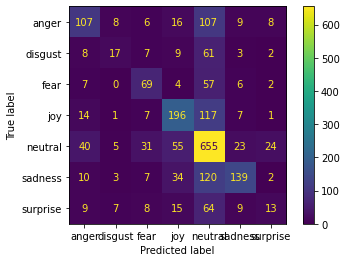

In [24]:
# GENERATE THE CLASSIFICATION REPORT AND CONFUSION MATRIX
report = classification_report(test_labels,bow_pred ,digits = 7, target_names=set(test_labels))
print('----------------------------------------------------------------')
print('BoW SVM report')
print(report)

print('----------------------------------------------------------------')
print('BoW SVM confusion matrix')
cf_matrix = confusion_matrix(test_labels,bow_pred)
print(cf_matrix)
display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=loaded_classifier.classes_)
display.plot()

## End of the assignment